In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [2]:
#checking out the ride_data df
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
#checking out the size
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [4]:
#checking out the city_data df
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#checking out the size
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Combine the data into a single dataset
# Display the data table for preview


#merging the ride_data and city_data
combined_data_df = pd.merge(ride_data_df, city_data_df, how="outer", on="city")
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [7]:
#grouping the merged data by city
grouped_data_df = combined_data_df.groupby(['city'])
grouped_data_df.count().head()

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Barronchester,16,16,16,16,16
Bethanyland,18,18,18,18,18
Bradshawfurt,10,10,10,10,10


In [8]:
#calculating the average fare per city
average_fare = grouped_data_df['fare'].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [9]:
#calculating total rides per city
total_rides = grouped_data_df['ride_id'].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [10]:
# creating a new data frame to hold the two new calculated data series 
grouped_data_one = pd.DataFrame(
                            {
                                "Total Rides": total_rides,
                                "Average Fare": average_fare,
                            }
)
grouped_data_one.head()

,Total Rides,Average Fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Barronchester,16,36.422500
Bethanyland,18,32.956111
Bradshawfurt,10,40.064000


In [11]:
#merge the newly created data frame with the original city data data frame
completed_df = pd.merge(grouped_data_one, city_data_df, on="city")
completed_df.head()

,city,Total Rides,Average Fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


In [12]:
#checking the stats
completed_df['Average Fare'].max()

43.278333333333336

In [13]:
#checking the stats
completed_df['Total Rides'].max()

39

In [14]:
#checking the stats
completed_df['driver_count'].max()

73

In [15]:
#######################################

In [16]:
# this was in theoriginal ipynb

## Bubble Plot of Ride Sharing Data

In [17]:
# Obtain the x and y coordinates for each of the three city types
x_axis = completed_df['Total Rides']

x1 = completed_df.loc[completed_df['type'] == "Urban"]
x1_axis = x1['Total Rides']

x2 = completed_df.loc[completed_df['type'] == "Suburban"]
x2_axis = x2['Total Rides']

x3 = completed_df.loc[completed_df['type'] == "Rural"]
x3_axis = x3['Total Rides']

y_axis = completed_df['Average Fare']

y1 = completed_df.loc[completed_df['type'] == "Urban"]
y1_axis = y1['Average Fare']

y2 = completed_df.loc[completed_df['type'] == "Suburban"]
y2_axis = y2['Average Fare']

y3 = completed_df.loc[completed_df['type'] == "Rural"]
y3_axis = y3['Average Fare']

size = completed_df['driver_count'] * 9

size1 = y1['driver_count'] * 9
size2 = y2['driver_count'] * 9
size3 = y3['driver_count'] * 9

# place holder for later - trying to use a function or zip to simplify plotting
#d1 = (x1_axis, y1_axis)
#d2 = (x2_axis, y2_axis)
#d3 = (x3_axis, y3_axis)



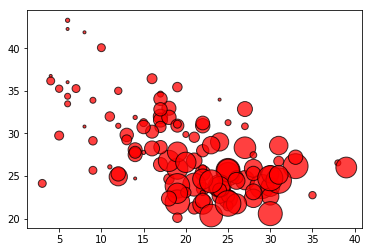

In [18]:
# Build the scatter plots for all - to make sure the math part was done correctl
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=size, alpha=0.75)

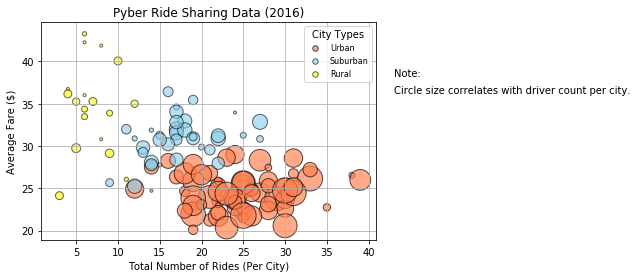

In [19]:
# Build the scatter plots for each city types
Urban = plt.scatter(x1_axis, y1_axis, marker="o", facecolors="coral", label = 'Urban', edgecolors="black",
            s=size1, alpha=0.67)
Suburban = plt.scatter(x2_axis, y2_axis, marker="o", facecolors="skyblue", label = 'Suburban', edgecolors="black",
            s=size2, alpha=0.6)
Rural = plt.scatter(x3_axis, y3_axis, marker="o", facecolors="yellow", label = 'Rural', edgecolors="black",
            s=size3, alpha=0.6)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()


# Create a legend
plt.legend(loc="upper right", title="City Types")
bubble = plt.legend([Urban, Suburban, Rural], ["Urban", "Suburban", "Rural"], fontsize = 8, markerscale = 0.5, title = "City Types")
bubble.legendHandles[0]._sizes = [30]
bubble.legendHandles[1]._sizes = [30]
bubble.legendHandles[2]._sizes = [30]


# Incorporate a text la,

plt.text(43,38, "Note:",
        rotation=0, size=10,
        ha='left', va='bottom')
plt.text(43,36, "Circle size correlates with driver count per city.",
        rotation=0, size=10,
        ha='left', va='bottom')

plt.show()            

In [20]:
# Save Figure
plt.savefig("FarevsRides.png")

<Figure size 432x288 with 0 Axes>

In [21]:
###############################################################################################

In [22]:
# Show plot
plt.show()

## Total Fares by City Type

In [23]:
urban_fares = combined_data_df.loc[combined_data_df['type'] == "Urban"]
urban_fares['fare'].sum()

39854.38

In [24]:
suburban_fares = combined_data_df.loc[combined_data_df['type'] == "Suburban"]
suburban_fares['fare'].sum()

19356.33

In [25]:
rural_fares = combined_data_df.loc[combined_data_df['type'] == "Rural"]
rural_fares['fare'].sum()

4327.929999999999

In [26]:
# Calculate Type Percents

# Labels for the sections of our pie chart
types = ["Urban", "Rural", "Suburban"]

values = [urban_fares['fare'].sum(),rural_fares['fare'].sum(),suburban_fares['fare'].sum()]

# The colors of each section of the pie chart
swatches = ["coral","yellow", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

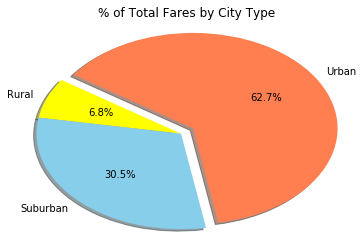

In [27]:
# Build Pie Chart
plt.pie(values, explode=explode, labels=types, colors=swatches,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title('% of Total Fares by City Type')
plt.axis('tight')
plt.show()

In [28]:
# Save Figure
plt.savefig("%FaresbyCityType.png")

<Figure size 432x288 with 0 Axes>

In [29]:
##############################################################################################

In [30]:
# Show Figure
plt.show()

## Total Rides by City Type

In [31]:
completed_df.head()

,city,Total Rides,Average Fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


In [32]:
urban_rides = completed_df.loc[completed_df['type'] == "Urban"]
urban_rides['Total Rides'].sum()

1625

In [33]:
suburban_rides = completed_df.loc[completed_df['type'] == "Suburban"]
suburban_rides['Total Rides'].sum()

625

In [34]:
rural_rides = completed_df.loc[completed_df['type'] == "Rural"]
rural_rides['Total Rides'].sum()

125

In [35]:
# Calculate Ride Percents

# Labels for the sections of our pie chart
types = ["Urban", "Rural", "Suburban"]

rides = [urban_rides['Total Rides'].sum(),rural_rides['Total Rides'].sum(),suburban_rides['Total Rides'].sum()]

# The colors of each section of the pie chart
watercolors = ["coral","yellow", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

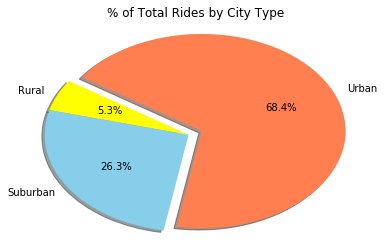

In [36]:
# Build Pie Chart


plt.pie(rides, explode=explode, labels=types, colors=watercolors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title('% of Total Rides by City Type')
plt.axis('tight')
plt.show()

In [37]:
# Save Figure
# Save Figure
plt.savefig("%RidesbyCityType.png")

<Figure size 432x288 with 0 Axes>

In [38]:
########################################################################################

In [39]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [40]:
urban_drivers = completed_df.loc[completed_df['type'] == "Urban"]
urban_drivers['driver_count'].sum()

2405

In [41]:
suburban_drivers = completed_df.loc[completed_df['type'] == "Suburban"]
suburban_drivers['driver_count'].sum()

490

In [42]:
rural_drivers = completed_df.loc[completed_df['type'] == "Rural"]
rural_drivers['driver_count'].sum()

78

In [43]:
# Calculate Driver Percents

# Labels for the sections of our pie chart
types = ["Urban", "Rural", "Suburban"]

drivers = [urban_rides['driver_count'].sum(),rural_rides['driver_count'].sum(),suburban_rides['driver_count'].sum()]

# The colors of each section of the pie chart
crayons = ["coral","yellow", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

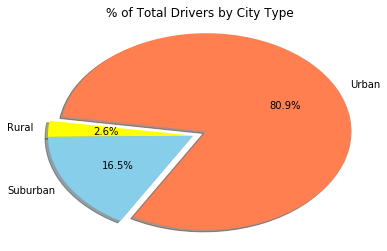

In [44]:
# Build Pie Charts
plt.pie(drivers, explode=explode, labels=types, colors=crayons,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title('% of Total Drivers by City Type')
plt.axis('tight')
plt.show()

In [45]:
# Save Figure
# Save Figure
plt.savefig("%DriversbyCityType.png")

<Figure size 432x288 with 0 Axes>

In [46]:
###############################################################################################

In [47]:
# Show Figure
plt.show()

In [ ]:
###############################################################################################

In [51]:
# Conclusions:
# 1.  As the scatter plot shows, urban cities defined as having higher population 
# have more drivers.  This is represented by bigger circles to the right of the plot. As we
# move from right to left, the blue circles are smaller as there are fewer drivers in suburban
# cities.  Finally, the smallest circles are the left circles in the left representing rural cities.
#
# 2.  The scatter plot also shows that the average fare for rides in urban cities are lower
# than $30 represented by the orange circles.  This makes sense, since having more drivers, 
# makes the ride share service more competitive in urban cities.  In contrast, most of the rides
# in the suburban cities and almost are rides in rural cities have an average fare above $30.

# 3.  All 3 pie charts paint similar picture that urban cities dominate the ride share business.
# 60% of all the fares are collected in urban cities, almost 70% of all rides
# are in urban cities, and 80% of all drivers are in urban cities.